In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Results/Experiments/Marker-gene-Exp_adipogenesis-w-drugs/Received_20231023/Adipogenic-marker-MSO_result.tsv', sep='\t').rename(columns={'aP2':'Fabp4'})
data_dict = {gene : {k: list(v) for k, v in data.groupby('Cond')[gene]} for gene in ['Pparg2','Fabp4','Adipoq']}

top_data = data.copy()
top_data.iloc[0:12, 1] = 5000
top_data.iloc[0:12, 2] = 500
top_data.iloc[0:12, 3] = 4000

bottom_data = data.copy()
bottom_data.iloc[12:24, 1:] = 5

# display(data_dict, data, top_data, bottom_data)

In [3]:
data2 = pd.read_csv(f'{Project}/Results/Experiments/Marker-gene-Exp_adipogenesis-w-drugs/Received_20230808/Thermogenic-marker-MSO_result.tsv', sep='\t').drop([4,5,6,7])
data_dict2 = {gene : {k: list(v) for k, v in data2.groupby('Cond')[gene]} for gene in ['Ucp1','Cox8b']}

data2['Cond'] = pd.Categorical(data2['Cond'], categories=['D0_none','D0_MSO','D4_none','D4_MSO'])
data2 = data2.sort_values('Cond').reset_index(drop=True)

top_data2 = data2.copy()
top_data2.iloc[0:4, 1] = 2000
top_data2.iloc[0:4, 2] = 1000

bottom_data2 = data2.copy()
bottom_data2.iloc[4:8, 1:] = 4

# display(data_dict2, data2, top_data2, bottom_data2)

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_83308/1242544328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_83308/1242544328.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=top_data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_83308/1242544328.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykern

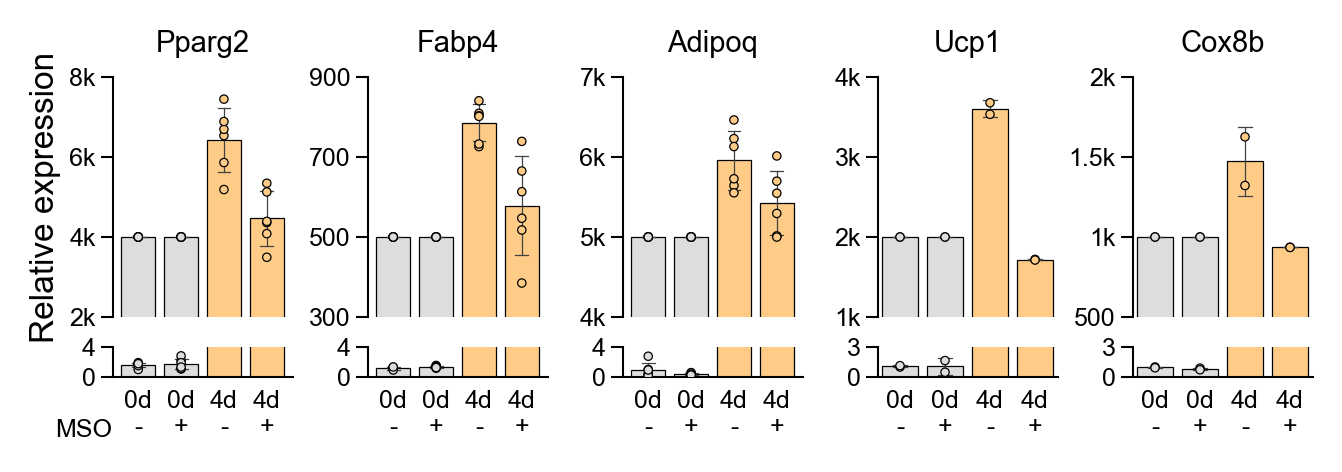

<Figure size 640x480 with 0 Axes>

In [5]:
err_kw = dict(lw=0.5, capsize=3, capthick=0.5)
ylim_ticks = {'Pparg2' :[(2000,8000),(2000,4000,6000,8000),('2k','4k','6k','8k')],
              'Fabp4'   :[(300,900),(300,500,700,900),(300,500,700,900)],
              'Adipoq':[(4000,7000),(4000,5000,6000,7000),('4k','5k','6k','7k')]
              }
ylim_ticks2= {'Ucp1' :[(1000,4000),(1000,2000,3000,4000),('1k','2k','3k','4k')],
              'Cox8b':[(500,2000),(500,1000,1500,2000),(500,'1k','1.5k','2k')]}

sF = 1 # Size factor
wgap = 0.25
hgap = 0.1
nrow, ncol = 2, 5

width_ratios = [1/7*4 +1/70*2] *5
height_ratios = [0.8, 0.1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

col = 0
for gene in ylim_ticks:
    ax = fig.add_subplot(grid[0,col])

    sns.barplot(data=top_data, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                ax=ax, linewidth = 0.3, edgecolor='k',
                legend=False)

    sns.stripplot(data=top_data, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)

    ax.set_xlim(-0.6, 3.6)
    ax.set_ylim(ylim_ticks[gene][0])
    ax.set_xticks([])
    ax.set_yticks(ylim_ticks[gene][1])
    ax.set_yticklabels(ylim_ticks[gene][2])
    ax.tick_params(width=0.5, length=3, pad=1)

    ax.set_title(gene, fontsize=7)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col==0 : ax.set_ylabel('Relative expression', labelpad=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # # Unpaired T-test
    # from scipy import stats
    # stat, pv = stats.ttest_ind(data_dict[gene]['D0_none'], data_dict[gene]['D0_MSO'])
    # ax.text(0.5, ylim_ticks[gene][0][1],f'{pv:.5f}', horizontalalignment='center', verticalalignment='top', fontsize=6, color='k', rotation=0)
    # stat, pv = stats.ttest_ind(data_dict[gene]['D4_none'], data_dict[gene]['D4_MSO'])
    # ax.text(2.5, ylim_ticks[gene][0][1],f'{pv:.5f}', horizontalalignment='center', verticalalignment='top', fontsize=6, color='k', rotation=0)



    ### bottom
    ax = fig.add_subplot(grid[1,col])

    sns.barplot(data=bottom_data, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                ax=ax, linewidth = 0.3, edgecolor='k',
                legend=False)

    sns.stripplot(data=bottom_data, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)

    ax.set_xlim(-0.6, 3.6)
    ax.set_ylim(0,4)
    ax.set_xticks([*range(4)])
    ax.set_yticks([0,4])
    ax.set_xticklabels(['0d\n-','0d\n+','4d\n-','4d\n+'], rotation=0)
    ax.tick_params(width=0.5, length=3, pad=1)
    ax.tick_params(axis='x', length=0, pad=3)

    ax.set_xlabel('')
    ax.set_ylabel('')

    if col==0 : ax.text(-0.6,-8,'MSO', ha='right',fontsize=6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)


    col += 1


for gene in ylim_ticks2:
    ax = fig.add_subplot(grid[0,col])

    sns.barplot(data=top_data2, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                ax=ax, linewidth = 0.3, edgecolor='k',
                legend=False)

    sns.stripplot(data=top_data2, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)

    ax.set_ylim(ylim_ticks2[gene][0])
    ax.set_xticks([])
    ax.set_yticks(ylim_ticks2[gene][1])
    ax.set_yticklabels(ylim_ticks2[gene][2])
    ax.tick_params(width=0.5, length=3, pad=1)

    ax.set_title(gene, fontsize=7)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col==0 : ax.set_ylabel('Relative expression', labelpad=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # # Unpaired T-test
    # from scipy import stats
    # stat, pv = stats.ttest_ind(data_dict[gene]['D0_none'], data_dict[gene]['D0_MSO'])
    # ax.text(0.5, ylim_ticks2[gene][0][1],f'{pv:.5f}', horizontalalignment='center', verticalalignment='top', fontsize=6, color='k', rotation=0)
    # stat, pv = stats.ttest_ind(data_dict[gene]['D4_none'], data_dict[gene]['D4_MSO'])
    # ax.text(2.5, ylim_ticks2[gene][0][1],f'{pv:.5f}', horizontalalignment='center', verticalalignment='top', fontsize=6, color='k', rotation=0)



    ### bottom
    ax = fig.add_subplot(grid[1,col])

    sns.barplot(data=bottom_data2, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                ax=ax, linewidth = 0.3, edgecolor='k',
                legend=False)

    sns.stripplot(data=bottom_data2, x="Cond", y=gene,
                palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)

    ax.set_ylim(0,3)
    ax.set_xticks([*range(4)])
    ax.set_yticks([0,3])
    ax.set_xticklabels(['0d\n-','0d\n+','4d\n-','4d\n+'], rotation=0)
    ax.tick_params(width=0.5, length=3, pad=1)
    ax.tick_params(axis='x', length=0, pad=3)

    ax.set_xlabel('')
    ax.set_ylabel('')

    if col==0 : ax.text(-0.6,-6,'MSO', ha='right',fontsize=6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)


    col += 1


## Show and save the plot
plt.savefig('MarkerExp-MSO_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()